In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import math

face_value, maturity, coupon = 100, 10, 0.05

cashflow = [face_value * coupon / 2] * maturity * 2
cashflow[-1] += face_value

plt.bar(np.arange(0, len(cashflow)/2,0.5)+0.5, cashflow, width=0.25)
plt.title(f"cashflow for a {100 * coupon}% {maturity} year bond",fontsize=15)
plt.ylabel("cash flow",fontsize=15)
plt.xlabel("years",fontsize=15)
plt.show()

<Figure size 640x480 with 1 Axes>

# discount rate

discount = $\left (1 + \frac{\text{discount rate}}{2}\right) ^{-t} $

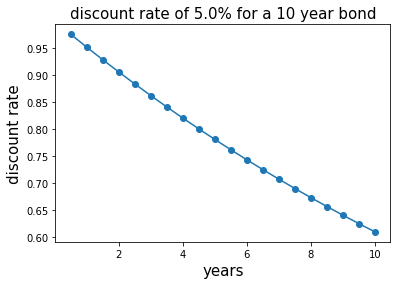

In [2]:
discount_rate = 0.05
discount = [1 / pow(1 + discount_rate/2, t + 1) for t, c in enumerate(cashflow)]
plt.plot(np.arange(0, len(cashflow)/2,0.5)+0.5, discount, 'o-')
plt.title(f"discount rate of {100 * coupon}% for a {maturity} year bond",fontsize=15)
plt.ylabel("discount rate",fontsize=15)
plt.xlabel("years",fontsize=15)
plt.show()

# discounted bond cashflows


$price = \sum_{t=1}^{2y} \frac {cashflow_t} {{\left (1 + \frac{\text{discount rate}}{2} \right )}^t} $

In [3]:
discount_rate = 0.05
sum([c / pow(1 + discount_rate/2, i + 1) for i, c in enumerate(cashflow)])

100.00000000000014

# Get zero coupon bond yields

In [4]:
import pickle

zero_coupon_rates = pickle.load(open("zero_coupon_curve.pkl", 'rb'))

## only keep days with all rates populated

In [5]:
keep = [t for s,t in zip(zero_coupon_rates.sum(axis=1, skipna=False), 
                         zero_coupon_rates.index) if not math.isnan(s)]
zeros = zero_coupon_rates.loc[keep,:]
zeros                          

,SVENY01,SVENY02,SVENY03,SVENY04,SVENY05,SVENY06,SVENY07,SVENY08,SVENY09,SVENY10,...,SVENY21,SVENY22,SVENY23,SVENY24,SVENY25,SVENY26,SVENY27,SVENY28,SVENY29,SVENY30
Date,,,,,,,,,,,,,,,,,,,,,
1985-11-25,7.8551,8.3626,8.7469,9.0408,9.2686,9.4481,9.5924,9.7110,9.8108,9.8969,...,10.4821,10.5196,10.5553,10.5893,10.6217,10.6526,10.6819,10.7099,10.7365,10.7618
1985-11-26,7.8527,8.3575,8.7420,9.0376,9.2677,9.4494,9.5956,9.7154,9.8158,9.9015,...,10.4497,10.4827,10.5139,10.5435,10.5715,10.5982,10.6234,10.6474,10.6701,10.6917
1985-11-27,7.8425,8.3522,8.7339,9.0231,9.2453,9.4193,9.5586,9.6727,9.7688,9.8515,...,10.4157,10.4514,10.4853,10.5176,10.5482,10.5773,10.6049,10.6311,10.6560,10.6796
1985-11-29,7.7914,8.3148,8.6991,8.9852,9.2024,9.3712,9.5061,9.6172,9.7115,9.7938,...,10.3798,10.4172,10.4526,10.4861,10.5179,10.5479,10.5763,10.6032,10.6287,10.6528
1985-12-02,7.8176,8.3457,8.7359,9.0294,9.2550,9.4327,9.5766,9.6962,9.7983,9.8874,...,10.4856,10.5206,10.5534,10.5842,10.6131,10.6402,10.6657,10.6897,10.7123,10.7335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-12,0.0863,0.1095,0.2112,0.3544,0.5152,0.6788,0.8363,0.9829,1.1164,1.2361,...,1.9213,1.9537,1.9842,2.0134,2.0415,2.0688,2.0956,2.1220,2.1481,2.1742
2021-02-16,0.0890,0.1263,0.2475,0.4098,0.5866,0.7625,0.9286,1.0807,1.2171,1.3380,...,2.0083,2.0394,2.0686,2.0964,2.1230,2.1488,2.1739,2.1986,2.2228,2.2468
2021-02-17,0.0810,0.1122,0.2354,0.4023,0.5839,0.7634,0.9318,1.0848,1.2210,1.3408,...,1.9903,2.0203,2.0488,2.0760,2.1021,2.1276,2.1525,2.1770,2.2012,2.2253


## rates and the shape of the zero coupon curve changes over time

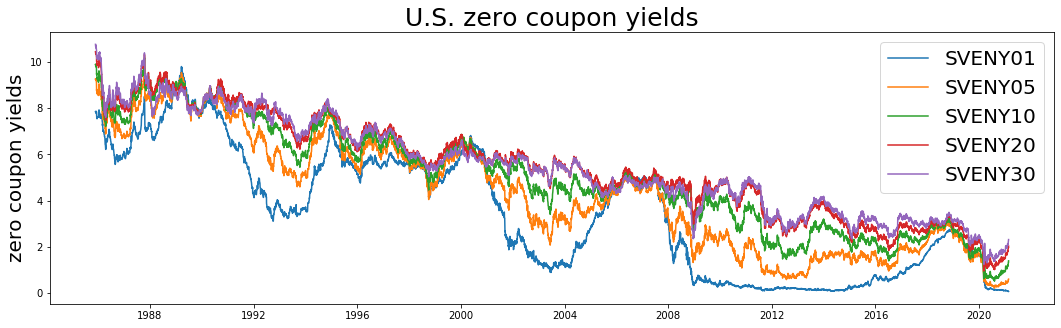

In [6]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(18,5))
for r in ['SVENY01','SVENY05', 'SVENY10', 'SVENY20', 'SVENY30']:
    plt.plot(zeros[r], label=r)

plt.title("U.S. zero coupon yields",fontsize=25)
plt.ylabel('zero coupon yields', fontsize=20)
plt.legend(fontsize=20)
plt.show()

C:\Users\Elliot\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Elliot\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


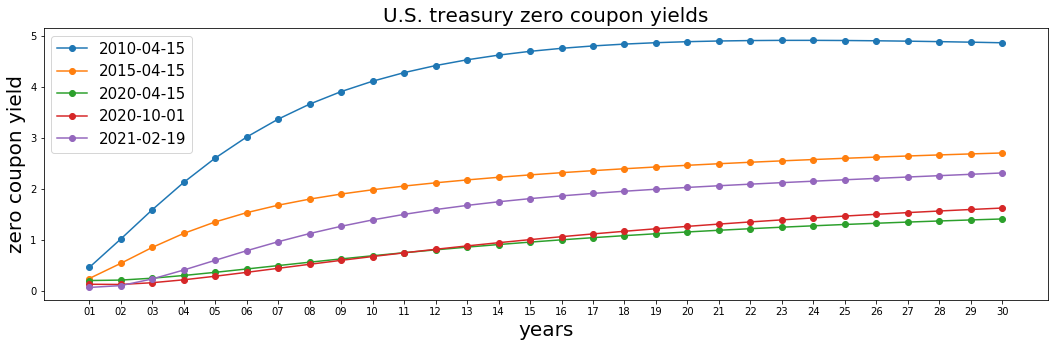

In [7]:
plt.figure(figsize=(18,5))
columns = [x[-2:] for x in zeros.columns]
for t in ['2010-04-15', '2015-04-15','2020-04-15','2020-10-01','2021-02-19']:
    plt.plot(columns, zeros.loc[t,:], 'o-', label=t)

plt.title("U.S. treasury zero coupon yields", fontsize=20)
plt.xlabel('years',fontsize=20)
plt.ylabel('zero coupon yield', fontsize=20)
plt.legend(fontsize=15)
plt.show()

# calculate 5% bond price using different zero rates

In [8]:
def compute_price(cashflow, discounts):
    return sum([c / pow(1 + d, i + 1) 
         for i, (c,d) in enumerate(zip(cashflow, discounts[:len(cashflow)]))])

discounts = np.array([[5]*30] * 2).T.flatten() / 200
print(f"bond price at 5% yield to maturity = {compute_price(cashflow, discounts):0.2f}\n")

times = ['2010-04-15', '2015-04-15','2020-04-15','2020-10-02','2021-02-19']
for t in times:
    discounts = np.array([zeros.loc[t,:]] * 2).T.flatten() / 200
print(f"{t} bond price ={compute_price(cashflow, discounts):0.2f}")

bond price at 5% yield to maturity = 100.00

2021-02-19 bond price =134.61


# Historical Simulation

# get range of future prices using historical simulation
### 1. price the bond using today's zero rates
### 2. compute the day-to-day changes in rates from 1 year to 30 years
### 3. add current day's rate (in this case 2020-10-02) to simulate tomorrow's rates
### 4. reprice the bond based on all those simulations
### 5. subtract today's bond price from step 1
### 6. get the 5% price point to get the 95% VaR

In [9]:
zeros[-5:]

,SVENY01,SVENY02,SVENY03,SVENY04,SVENY05,SVENY06,SVENY07,SVENY08,SVENY09,SVENY10,...,SVENY21,SVENY22,SVENY23,SVENY24,SVENY25,SVENY26,SVENY27,SVENY28,SVENY29,SVENY30
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-12,0.0863,0.1095,0.2112,0.3544,0.5152,0.6788,0.8363,0.9829,1.1164,1.2361,...,1.9213,1.9537,1.9842,2.0134,2.0415,2.0688,2.0956,2.1220,2.1481,2.1742
2021-02-16,0.0890,0.1263,0.2475,0.4098,0.5866,0.7625,0.9286,1.0807,1.2171,1.3380,...,2.0083,2.0394,2.0686,2.0964,2.1230,2.1488,2.1739,2.1986,2.2228,2.2468
2021-02-17,0.0810,0.1122,0.2354,0.4023,0.5839,0.7634,0.9318,1.0848,1.2210,1.3408,...,1.9903,2.0203,2.0488,2.0760,2.1021,2.1276,2.1525,2.1770,2.2012,2.2253
2021-02-18,0.0801,0.1086,0.2297,0.3954,0.5766,0.7564,0.9255,1.0795,1.2167,1.3375,...,1.9973,2.0287,2.0587,2.0875,2.1155,2.1430,2.1700,2.1968,2.2234,2.2501
2021-02-19,0.0752,0.1110,0.2411,0.4164,0.6068,0.7949,0.9712,1.1313,1.2736,1.3985,...,2.0683,2.0994,2.1290,2.1575,2.1852,2.2124,2.2392,2.2658,2.2924,2.3190


In [10]:
print("current zero coupon rate")
display(pd.DataFrame(zeros.loc['2020-10-02',:]).transpose())
print("daily change in yields")
display(zeros.diff()[-3:])
simulations = zeros.diff().add(zeros.loc['2020-10-02',:])[1:]
print("simulated future yields")
display(simulations[-3:])

current zero coupon rate


,SVENY01,SVENY02,SVENY03,SVENY04,SVENY05,SVENY06,SVENY07,SVENY08,SVENY09,SVENY10,...,SVENY21,SVENY22,SVENY23,SVENY24,SVENY25,SVENY26,SVENY27,SVENY28,SVENY29,SVENY30
2020-10-02,0.1371,0.1359,0.174,0.2348,0.308,0.387,0.4679,0.5483,0.6269,0.7029,...,1.3434,1.3862,1.4269,1.4656,1.5024,1.5375,1.5709,1.6026,1.6329,1.6617


daily change in yields


,SVENY01,SVENY02,SVENY03,SVENY04,SVENY05,SVENY06,SVENY07,SVENY08,SVENY09,SVENY10,...,SVENY21,SVENY22,SVENY23,SVENY24,SVENY25,SVENY26,SVENY27,SVENY28,SVENY29,SVENY30
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-17,-0.0080,-0.0141,-0.0121,-0.0075,-0.0027,0.0009,0.0032,0.0041,0.0039,0.0028,...,-0.018,-0.0191,-0.0198,-0.0204,-0.0209,-0.0212,-0.0214,-0.0216,-0.0216,-0.0215
2021-02-18,-0.0009,-0.0036,-0.0057,-0.0069,-0.0073,-0.0070,-0.0063,-0.0053,-0.0043,-0.0033,...,0.007,0.0084,0.0099,0.0115,0.0134,0.0154,0.0175,0.0198,0.0222,0.0248
2021-02-19,-0.0049,0.0024,0.0114,0.0210,0.0302,0.0385,0.0457,0.0518,0.0569,0.0610,...,0.071,0.0707,0.0703,0.0700,0.0697,0.0694,0.0692,0.0690,0.0690,0.0689


simulated future yields


,SVENY01,SVENY02,SVENY03,SVENY04,SVENY05,SVENY06,SVENY07,SVENY08,SVENY09,SVENY10,...,SVENY21,SVENY22,SVENY23,SVENY24,SVENY25,SVENY26,SVENY27,SVENY28,SVENY29,SVENY30
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-17,0.1291,0.1218,0.1619,0.2273,0.3053,0.3879,0.4711,0.5524,0.6308,0.7057,...,1.3254,1.3671,1.4071,1.4452,1.4815,1.5163,1.5495,1.5810,1.6113,1.6402
2021-02-18,0.1362,0.1323,0.1683,0.2279,0.3007,0.3800,0.4616,0.5430,0.6226,0.6996,...,1.3504,1.3946,1.4368,1.4771,1.5158,1.5529,1.5884,1.6224,1.6551,1.6865
2021-02-19,0.1322,0.1383,0.1854,0.2558,0.3382,0.4255,0.5136,0.6001,0.6838,0.7639,...,1.4144,1.4569,1.4972,1.5356,1.5721,1.6069,1.6401,1.6716,1.7019,1.7306


In [11]:
def price_bond(cashflow, rates):
    return compute_price(cashflow, np.array([rates] * 2).T.flatten() / 200)

price_today = price_bond(cashflow, zeros.loc[t,:])
print("price today = ",price_today)

price today =  134.60750231399652


In [12]:
future_prices = [price_bond(cashflow, simulations.loc[t,:]) for t in simulations.index]
print(future_prices[-5:])
price_change = future_prices - price_today
print(price_change[-5:])

[141.37597550876743, 140.84465458195712, 141.9700943228877, 142.04062146245565, 141.32334953812125]
[6.76847319 6.23715227 7.36259201 7.43311915 6.71584722]


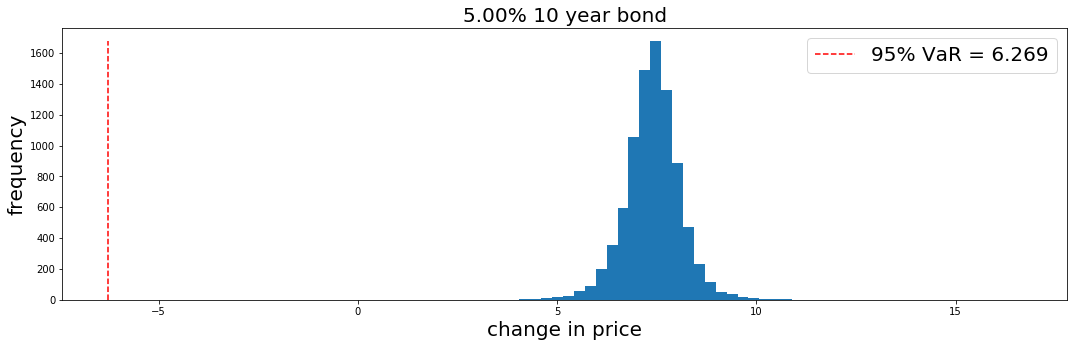

In [13]:
plt.figure(figsize=(18,5))
hist = plt.hist(price_change, 50)
VaR95 = -np.quantile(price_change, 0.05)
plt.plot([VaR95, VaR95], [0,max(hist[0])],'--',color='red',label = f"95% VaR = {-VaR95:0.3f}")
plt.title(f"{100 * coupon:0.2f}% {maturity} year bond",fontsize=20)
plt.xlabel('change in price', fontsize=20)
plt.ylabel('frequency', fontsize=20)
plt.legend(fontsize=20)
plt.show()

# HW

# #1

In [14]:
face_value, maturity, coupon = 100, 30, 0.06

cashflow = [face_value * coupon / 2] * maturity * 2
cashflow[-1] += face_value

print(f"min = 0 when yield is infinite, max = {sum(cashflow)} when yield = 0")

min = 0 when yield is infinite, max = 280.0 when yield = 0


# #2

In [15]:
from scipy.optimize import minimize

def compute_price(cashflow, discounts):
    return sum([c / pow(1 + d, i + 1) 
         for i, (c,d) in enumerate(zip(cashflow, discounts[:len(cashflow)]))])

def compute_price_from_yield(cashflow, yield_to_maturity):
    discounts = [yield_to_maturity / 2] * len(cashflow)
    return compute_price(cashflow, discounts)

class find_ytm():
    def __init__(self, cashflow, price):
        self.cashflow, self.price = cashflow, price
        
    def get_price_fit(self, ytm):
        price = compute_price_from_yield(self.cashflow, ytm)
        return pow(price - self.price, 2)

face_value, maturity, coupon = 100, 10, 0.07

cashflow = [face_value * coupon / 2] * maturity * 2
cashflow[-1] += face_value

print("price at 6% yield = ",compute_price_from_yield(cashflow, 0.06))

x0 = np.array([0.07]) 
P = find_ytm(cashflow, 105)
res = minimize(P.get_price_fit, x0, method='nelder-mead',
               options={'xatol': 1e-8, 'disp': False, 'maxiter':100000})
ytm = res.x[0]
print(f"yield to maturity = {ytm:0.3f}")

print(f"price at {ytm:0.3f} yield = {compute_price_from_yield(cashflow, ytm):0.3f}")

price at 6% yield =  107.43873743022772
yield to maturity = 0.063
price at 0.063 yield = 105.000


# #3

In [16]:
def price_bond(cashflow, rates):
    return compute_price(cashflow, np.array([rates] * 2).T.flatten() / 200)

face_value, maturity, coupon = 100, 10, 0.07

cashflow = [face_value * coupon / 2] * maturity * 2
cashflow[-1] += face_value

price_today = price_bond(cashflow, zeros.loc[t,:])
print("price today = ",price_today)

recent_sim = simulations['2017-01-01':'2021-02-19']
future_prices = [price_bond(cashflow, simulations.loc[t,:]) for t in simulations.index]
price_change = future_prices - price_today

price today =  153.65402654526557


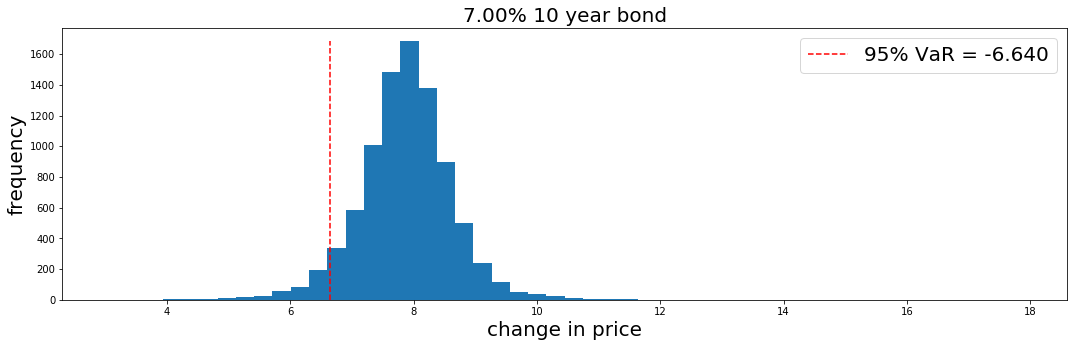

In [17]:
plt.figure(figsize=(18,5))
hist = plt.hist(price_change, 50)
VaR95 = np.quantile(price_change, 0.05)

plt.plot([VaR95, VaR95], [0,max(hist[0])],'--',color='red',label = f"95% VaR = {-VaR95:0.3f}")
plt.title(f"{100 * coupon:0.2f}% {maturity} year bond",fontsize=20)
plt.xlabel('change in price', fontsize=20)
plt.ylabel('frequency', fontsize=20)
plt.legend(fontsize=20)
plt.show()